In [23]:
import numpy as np
import matplotlib.pyplot as plt
from DFT import *

## HW8
### \#3

Write a code that implements trigonometric least square. You may use fft package (`numpy.fft.fft`, `numpy.fft.ifft`, `numpy.real`, `numpy.imag`) offered by NumPy appropriately.

a) Data 

In [24]:
L = 3
h = L / 16
t = np.arange(16) * h
x = np.array([2.5433, 1.8744, 1.695, 1.6759, 
              2.7873, 1.6847, 1.7283, 1.8506, 
              2.5267, 2.1502, 1.2686, 2.2924, 
              2.1646, 2.2637, 1.2958, 2.076])

b) Plot the data

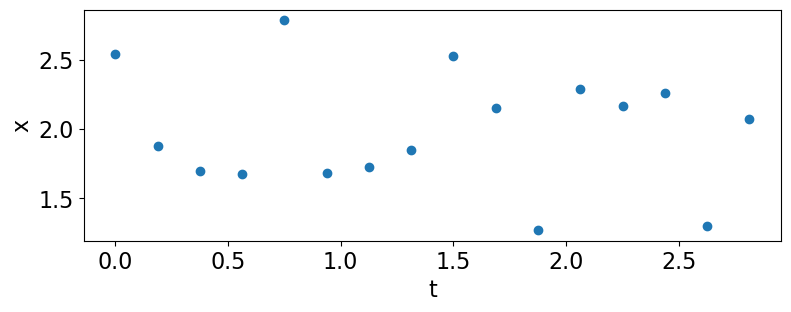

In [25]:
plt.figure(figsize=(9,3))
plt.scatter(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

c) Find a function belonging to $V = \text{span}\{f_k(t)\}_{k=0}^m \cup \{g_l(t)\}_{l = 1}^{m-1} \subset C_{per}[0,L]$, the set of all continuous, periodic functions defined on [0,L], where $m = 5, f_k(t) = \text{cos}\frac{2\pi kt}{L} (j = 0, 1, 2, \dots, m)$ and $g_l(t) = \text{sin}\frac{2\pi lt}{L} (l = 1,2, \dots, m-1)$

In [26]:
plt.rcParams['font.size'] = 16

def lin_comb(fs, cs, x, plot=False, **kwarg):
    """
    Return 1D array of the linear combination of functions evaluated at a grid domain.

    Input:
        fs (list): (stands for functions) ndarray compatible functions
        cs (array-like): (stands for coefficients) coefficients of same length of fs
        x: grid domain
    Output:
        cfs: (stands for c*f's) array of function values of the linear combination evaluated
        at the grid domain.
    Side-effect:
        plot
    """
    cfs = np.zeros((len(fs), len(x)))

    for i, f in enumerate(fs):
        cfs[i, :] = cs[i]*fs[i](x)
    
    cfs = np.sum(cfs, axis=0)
    
    if plot==True:
        plt.figure(figsize=(9, 3))  
        plt.plot(x, cfs, label="Linear combination")
        plt.show()

    return cfs

In [28]:
#y = np.fft.fft(x)
y = DFT(x)

[[ 7.96937500e+00+0.00000000e+00j]
 [-1.21568771e-02+1.65662258e-02j]
 [ 3.56237960e-02-5.71697238e-03j]
 [ 9.06789721e-03+5.22909099e-03j]
 [ 1.00855000e+00-1.95250000e-02j]
 [ 1.38877847e-03-2.45390183e-03j]
 [ 2.34262040e-02-3.59669724e-02j]
 [ 1.83002014e-02+6.31583233e-01j]
 [ 3.54250000e-02-9.60442182e-16j]
 [ 1.83002014e-02-6.31583233e-01j]
 [ 2.34262040e-02+3.59669724e-02j]
 [ 1.38877847e-03+2.45390183e-03j]
 [ 1.00855000e+00+1.95250000e-02j]
 [ 9.06789721e-03-5.22909099e-03j]
 [ 3.56237960e-02+5.71697238e-03j]
 [-1.21568771e-02-1.65662258e-02j]]


Using `numpy.fft.fft` returned the wrong vector so I opted for using the DFT function we created when doing HW7.

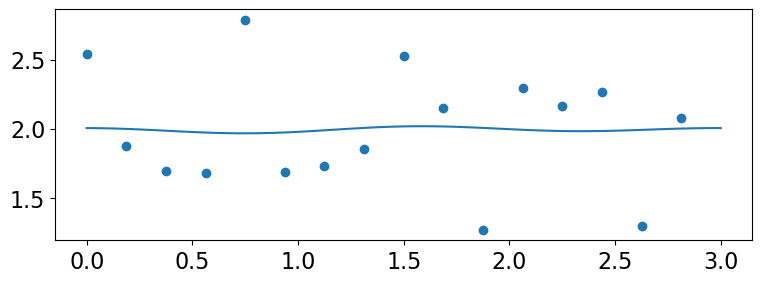

In [32]:
# split coef into real and imaginary parts for interpolating function
a = np.real(y)
b = -1. * np.imag(y) # flip sign for interpolating function

# setting more parameters
c, d = 0, L
n = 16
m = 5 # number of functions to subset for least squares soln

# functions for interpolating function
functions = [
    lambda t: (1./np.sqrt(n)),
    lambda t: (2./np.sqrt(n)) * np.cos(2.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.sin(2.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(4.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.sin(4.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(6.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.sin(6.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(8.*np.pi*(t-c)/(d-c)), 
    lambda t: (2./np.sqrt(n)) * np.sin(8.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(10.*np.pi*(t-c)/(d-c)), 
    lambda t: (2./np.sqrt(n)) * np.sin(10.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(12.*np.pi*(t-c)/(d-c)), 
    lambda t: (2./np.sqrt(n)) * np.sin(12.*np.pi*(t-c)/(d-c)),
    lambda t: (2./np.sqrt(n)) * np.cos(14.*np.pi*(t-c)/(d-c)), 
    lambda t: (2./np.sqrt(n)) * np.sin(14.*np.pi*(t-c)/(d-c)),
    lambda t: (1./np.sqrt(n)) * np.cos(16.*np.pi*(t-c)/(d-c))
]

# extract coefficents using a and b (manually flip sign for b coefficients)
coef = [a[0],a[1],b[1],a[2],b[2],a[3],b[3],a[4],
        b[4],a[5],b[5],a[6],b[6],a[7],b[7],a[8]]

# fitting and plotting
p = 100
tt = np.linspace(c, d, p)

cfs = lin_comb(functions[:m], coef[:m], tt)

plt.figure(figsize=(9, 3))
plt.scatter(t, x)
plt.plot(tt, cfs)
plt.show()